<a href="https://colab.research.google.com/github/juanosalvador/T-cnicas-de-Clustering/blob/main/DBSCAN_MAKE_BLOBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs 

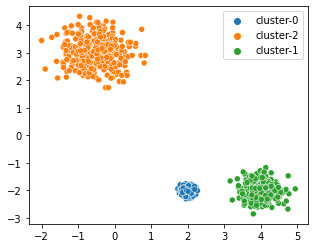

In [67]:
centers = [[2,-2],[4,-2],[-0.5,3]]
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, cluster_std=[0.1,0.3,0.5],
                  random_state=0)

figure = plt.figure(figsize=(5,4))
sns.scatterplot(x=X[:,0],y=X[:,1], hue = ['cluster-{}'.format(x) for x in y])
plt.show()